In [152]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from psmpy.plotting import *
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import scipy as sc

In [153]:

####Train ################################################
tr_p=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/train_personas.Rds") 
tr_h=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/train_hogares.Rds")
print(tr_p.keys())
print(tr_h.keys())
df_trp=tr_p[None] #train Data frame (individuals). 
df_trh=tr_h[None] #Train Data frame (households). 

odict_keys([None])
odict_keys([None])


In [154]:
df=pd.merge(df_trp, df_trh, on="id") #Train master data frame (merge by unique identificator key). 
df.rename(columns={"Clase_x": "clase"})
df.rename(columns={"Dominio_x": "Dominio"})

,id,Orden,Clase_x,Dominio,Estrato1,P6020,P6040,P6050,P6090,P6100,...,Ingpcug,Li,Lp,Pobre,Indigente,Npobres,Nindigentes,Fex_c_y,Depto_y,Fex_dpto_y
0,9e6553aeb6e744f39a554896,2.0,1,MEDELLIN,2.0,2.0,38.0,2.0,1.0,1.0,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
1,9e6553aeb6e744f39a554896,5.0,1,MEDELLIN,2.0,1.0,3.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
2,9e6553aeb6e744f39a554896,1.0,1,MEDELLIN,2.0,1.0,41.0,1.0,1.0,1.0,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
3,9e6553aeb6e744f39a554896,4.0,1,MEDELLIN,2.0,1.0,3.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
4,9e6553aeb6e744f39a554896,3.0,1,MEDELLIN,2.0,1.0,11.0,3.0,NaN,NaN,...,5.816661e+05,122809.534158,289878.247150,0.0,0.0,0.0,0.0,127.222038,05,146.251790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542936,56e44db1f6eccf55a29d4a84,2.0,1,BOGOTA,2.0,2.0,24.0,2.0,1.0,1.0,...,4.799466e+05,123416.961118,280522.423188,0.0,0.0,0.0,0.0,386.721150,11,386.721150
542937,904fe39b94b4db42fbd104a3,1.0,1,BOGOTA,3.0,2.0,36.0,1.0,1.0,1.0,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945
542938,904fe39b94b4db42fbd104a3,2.0,1,BOGOTA,3.0,1.0,41.0,2.0,1.0,1.0,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945
542939,904fe39b94b4db42fbd104a3,3.0,1,BOGOTA,3.0,1.0,8.0,3.0,NaN,NaN,...,1.706250e+06,123416.961118,280522.423188,0.0,0.0,0.0,0.0,341.056945,11,341.056945


In [155]:
#Test ############################################################################################
te_p=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/test_personas.Rds") 
te_h=pyr.read_r("C:/Users/juand/Desktop/Big Data/Taller 2/test_hogares.Rds")
print(te_p.keys())
print(te_h.keys())
df_tep=te_p[None] #test Data frame (individuals). 
df_teh=te_h[None] #test Data frame (households). 

odict_keys([None])
odict_keys([None])


In [156]:
df_test=pd.merge(df_tep, df_teh, on="id") #Test master data frame (merge by unique identificator key). 
df_test.rename(columns={"Clase_x": "clase"})
df_test.rename(columns={"Dominio_x": "Dominio"})

,id,Orden,Clase_x,Dominio,P6020,P6040,P6050,P6090,P6100,P6210,...,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Fex_c_y,Depto_y,Fex_dpto_y
0,cefe4dc0e5814074bfa06fb2,1.0,1,MEDELLIN,1.0,33.0,1.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
1,cefe4dc0e5814074bfa06fb2,3.0,1,MEDELLIN,2.0,7.0,3.0,NaN,NaN,3.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
2,cefe4dc0e5814074bfa06fb2,2.0,1,MEDELLIN,2.0,37.0,2.0,1.0,1.0,6.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
3,cefe4dc0e5814074bfa06fb2,4.0,1,MEDELLIN,1.0,5.0,3.0,NaN,NaN,2.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,125.720226,05,126.041802
4,b281b20ec5b0c0c76b160041,4.0,1,MEDELLIN,1.0,53.0,5.0,1.0,3.0,1.0,...,NaN,NaN,250000.0,4.0,4.0,122809.534158,289878.247150,115.866093,05,93.080952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219807,693684cc4c15668f6fd4e0fe,1.0,1,RIOHACHA,1.0,74.0,1.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219808,693684cc4c15668f6fd4e0fe,2.0,1,RIOHACHA,2.0,74.0,2.0,1.0,2.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219809,693684cc4c15668f6fd4e0fe,3.0,1,RIOHACHA,2.0,19.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896
219810,693684cc4c15668f6fd4e0fe,4.0,1,RIOHACHA,2.0,18.0,4.0,1.0,1.0,6.0,...,NaN,1000000.0,NaN,5.0,5.0,120863.570032,275548.097647,4.120660,44,5.192896


In [157]:
######################################Train #############################################################################

#Convert categorical variables to dummy variables:
estrato1_d=pd.get_dummies(df["Estrato1"], prefix="estrato") 
maxeduc_d=pd.get_dummies(df["P6210"], prefix="educ") 

df=pd.merge(df, estrato1_d, left_index=True, right_index=True)
df=pd.merge(df, maxeduc_d, left_index=True, right_index=True)



In [158]:
var=["P6585s3"]

for i in var:
    df[i]=np.where(df[i]==9, np.nan, df[i])
    df[i]=np.where(df[i]==1, 1, 0*df[i])



ceros=["Oc", "Des", "Ina"]

##Replace Na=0 in Ocupados, Desocupados and Inactivos
for i in ceros:
    df[i]=np.where(df[i]==1, 1, 0)



In [159]:
#Generate descriptive statistics of train dataset
ds=(df[["Ingtotugarr", "Ingtot", "P6040", "Nper", "Pobre", "P6020", "estrato_1.0", "estrato_2.0", "estrato_3.0", 
"estrato_4.0", "estrato_5.0", "estrato_6.0", "educ_1.0", "educ_2.0", "educ_3.0", "educ_4.0", "educ_5.0", "educ_6.0", "P6585s3", "Oc"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     count &        mean &         std &  min &         50\% &          max \\
\midrule
Ingtotugarr &  542941.0 &  2494456.17 &  2640107.05 &  0.0 &  1796407.33 &  88833333.33 \\
Ingtot      &  447512.0 &   775591.56 &  1380447.03 &  0.0 &   430000.00 &  85833333.33 \\
P6040       &  542941.0 &       33.55 &       21.64 &  0.0 &       31.00 &       110.00 \\
Nper        &  542941.0 &        4.25 &        2.07 &  1.0 &        4.00 &        22.00 \\
Pobre       &  542941.0 &        0.25 &        0.43 &  0.0 &        0.00 &         1.00 \\
P6020       &  542941.0 &        1.53 &        0.50 &  1.0 &        2.00 &         2.00 \\
estrato\_1.0 &  542941.0 &        0.22 &        0.41 &  0.0 &        0.00 &         1.00 \\
estrato\_2.0 &  542941.0 &        0.26 &        0.44 &  0.0 &        0.00 &         1.00 \\
estrato\_3.0 &  542941.0 &        0.22 &        0.42 &  0.0 &        0.00 &         1.00 \\
estrato\_4.0 &  542941.0 &        0.11 &        0.32

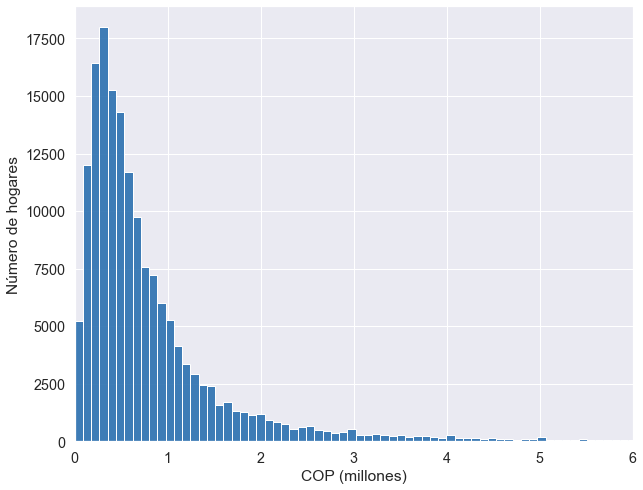

In [160]:
#Histogram of ingtotug
#Histogram of household per_capita income:
df_trh["Ingtotugarr_mM"]=df_trh["Ingtotugarr"]/df_trh["Nper"]/1000000
plt.hist(df_trh["Ingtotugarr_mM"], bins=1000, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(0,6)
#plt.ylim(0,10000)
plt.xticks([i for i in range(7)])
plt.ylabel("Número de hogares")
plt.xlabel("COP (millones)")
plt.savefig("histy_ipch.jpg", bbox_inches="tight")
plt.show()

In [162]:
############################## Collapse data base at household level #############################
####Keep only parentesco=jefe hogar
dfc = df[df["P6050"]==1]

###########collapse train ##################
pe=pd.DataFrame(df["P6040"].groupby(df["id"]).mean()).reset_index()
pe=pe.rename(columns={"P6040": "promedad"})
pe=pe["promedad"]
dfc=pd.merge(dfc,pe, left_index=True, right_index=True)

listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    pe=pd.DataFrame(df[i].groupby(df["id"]).sum()).reset_index()
    pe=pe.rename(columns={i: i+"col"})
    pe=pe[i+"col"]
    dfc=pd.merge(dfc,pe, left_index=True, right_index=True)


#############collapse test####################################3
####Keep only parentesco=jefe hogar
df_testc = df_test[df_test["P6050"]==1]

###########collapse test ##################
pe=pd.DataFrame(df_test["P6040"].groupby(df_test["id"]).mean()).reset_index()
pe=pe.rename(columns={"P6040": "promedad"})
pe=pe["promedad"]
df_testc=pd.merge(df_testc,pe, left_index=True, right_index=True)


listg=["P6800", "P7045","Pet", "Oc"]

for i in listg:
    pe=pd.DataFrame(df_test[i].groupby(df_test["id"]).sum()).reset_index()
    pe=pe.rename(columns={i: i+"col"})
    pe=pe[i+"col"]
    df_testc=pd.merge(df_testc,pe, left_index=True, right_index=True)





In [163]:
df_testc.columns

Index(['id', 'Orden', 'Clase_x', 'Dominio_x', 'P6020', 'P6040', 'P6050',
       'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426',
       'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3',
       'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2',
       'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040',
       'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310',
       'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505',
       'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet',
       'Oc', 'Des', 'Ina', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Clase_y',
       'Dominio_y', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140',
       'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c_y', 'Depto_y', 'Fex_dpto_y',
       'promedad', 'P6800col', 'P7045col', 'Petcol', 'Occol'],
      dtype='object')

In [164]:
#########Get dummies and recode for regression
##Save variables pre get dummies
v1=[i for i in df_testc.columns]


###########Get dummies train
maxeduc_d=pd.get_dummies(dfc["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(dfc["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(dfc["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(dfc["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(dfc["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(dfc["P6240"], prefix="act")
numper_d=pd.get_dummies(dfc["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(dfc["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(dfc["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(dfc["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(dfc["Oficio"], prefix="oficio")


#Merge dummy's variables data frame with master data frame:
dfc=pd.merge(dfc, estrato1_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, maxeduc_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, dominio_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, departamento_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, trabajo_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, salud_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, actividad_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, numper_d, left_index=True, right_index=True)
dfcc=pd.merge(dfc, ocseg_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, trabdeso_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, tipovivienda_d, left_index=True, right_index=True)
dfc=pd.merge(dfc, oficio_d, left_index=True, right_index=True)


In [165]:
#######Recode variables
var=(["P6020", "P6090", "P6510", "P6545", "P6580", "P6585s1", "P6585s2", "P6585s3", "P6585s4", "P6590", "P6600", "P6610", "P6620"
 ,"P6630s1", "P6630s2", "P6630s3", "P6630s4" ,"P6630s6" , "P6920","P7040","P7090","P7110","P7120","P7150", "P7160", "P7310",
 "P7422", "P7472", "P7495", "P7500s2", "P7500s3","P7505", "P7510s1", "P7510s2","P7510s3", "P7510s5", "P7510s6", "P7510s7"])

for i in var:
    dfc[i]=np.where(dfc[i]==9, np.nan, dfc[i])
    dfc[i]=np.where(dfc[i]==1, 1, 0*dfc[i])

for i in var:
    df_testc[i]=np.where(df_testc[i]==9, np.nan, df_testc[i])
    df_testc[i]=np.where(df_testc[i]==1, 1, 0*df_testc[i])



In [166]:

##########Get dummies test ######################################
maxeduc_d=pd.get_dummies(df_testc["P6210"], prefix="educ") 
dominio_d=pd.get_dummies(df_testc["Dominio_x"], prefix="dominio")
departamento_d=pd.get_dummies(df_testc["Depto_x"], prefix="depto")
salud_d=pd.get_dummies(df_testc["P6100"], prefix="salud")
trabajo_d=pd.get_dummies(df_testc["P6430"], prefix="trabajo")
actividad_d=pd.get_dummies(df_testc["P6240"], prefix="act")
numper_d=pd.get_dummies(df_testc["P6870"], prefix="numper")
ocseg_d=pd.get_dummies(df_testc["P7050"], prefix="ocseg")
trabdeso_d=pd.get_dummies(df_testc["P7350"], prefix="trabdeso")
tipovivienda_d=pd.get_dummies(df_testc["P5090"], prefix="tipoviv")
oficio_d=pd.get_dummies(df_testc["Oficio"], prefix="oficio")

#Merge dummy's variables data frame with master data frame:
df_testc=pd.merge(df_testc, maxeduc_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, dominio_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, departamento_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, salud_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, trabajo_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, actividad_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, numper_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, ocseg_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, trabdeso_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, tipovivienda_d, left_index=True, right_index=True)
df_testc=pd.merge(df_testc, oficio_d, left_index=True, right_index=True)

In [168]:
###Split train and test using training database. 
#Train sub test database using PSM to reproduce test 

elim=(["id", "Orden", "Fex_c_y", "Clase_y", "Dominio_y", "Depto_y", "Dominio_x", "Depto_x",  "Fex_dpto_y", "Fex_dpto_x", "Fex_c_x" , "Depto_x", 
"P6050" , "P6210s1", "P6210s1" , "educ_1.0" , "dominio_ARMENIA" , "depto_05", "salud_1.0", "salud_9.0" , "trabajo_9.0", "act_1.0", 
"numper_1.0", "ocseg_1.0", "trabdeso_1.0", "tipoviv_1.0", "oficio_1.0", "P6100", "P6210", "P6240" , "Oficio", "P6430", "P6870", "P7050", 
"P7350" , "P5090" 'educ_5.0', 'ocseg_8.0', 'ocseg_3.0', 'educ_2.0', 'ocseg_2.0', 'ocseg_4.0', 'ocseg_7.0', 'ocseg_9.0', 
'ocseg_6.0', 'educ_4.0', 'educ_3.0', 'ocseg_5.0', 'educ_6.0', 'oficio_0.0', 'educ_9.0', 'educ_5.0'])

dfc["test"]=0
df_testc["test"]=1

v2=[i for i in df_testc.columns if i not in elim]


####Dealing with nans
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x1=df_testc[v2]
x1=imp_mean.fit_transform(x1)

x2=dfc[v2]
x2=imp_mean.fit_transform(x2)


c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X
c:\Users\juand\anaconda3\lib\site-packages\sklearn\utils\fixes.py:44: RuntimeWarning: invalid value encountered in not_equal
  return X != X


In [169]:
#Create a X matrix of covariates
x11=pd.DataFrame(x1, columns=v2)
x22=pd.DataFrame(x2, columns=v2)
X=x22.append(x11, ignore_index=True)

#Create matrix Y
Y=X["test"]
Y=Y.astype('int')

In [170]:
## Generate PSM of test
lr = LogisticRegression(random_state=911, class_weight="balanced")
result=lr.fit(X,Y)
PSM=result.predict_proba(X)

In [171]:
PSM=pd.DataFrame(PSM, columns=["no", "si"])
PSM
X=pd.merge(X,PSM, left_index=True, right_index=True) 
X

,Clase_x,P6020,P6040,P6090,P6426,P6510,P6545,P6580,P6585s1,P6585s2,...,oficio_93.0,oficio_94.0,oficio_95.0,oficio_96.0,oficio_97.0,oficio_98.0,oficio_99.0,test,no,si
0,1,1.0,41.0,1.0,240.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.500508,0.499492
1,1,0.0,38.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.500639,0.499361
2,1,1.0,43.0,1.0,216.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.500529,0.499471
3,1,1.0,48.0,1.0,84.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.500509,0.499491
4,1,1.0,51.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.500660,0.499340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69800,1,0.0,35.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.500231,0.499769
69801,1,0.0,21.0,1.0,36.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0.500231,0.499769
69802,1,1.0,26.0,1.0,72.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0.501493,0.498507
69803,1,0.0,25.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0.499649,0.500351


In [172]:
grouped = X.groupby(X.test)
X_train = grouped.get_group(0)
X_test = grouped.get_group(1)

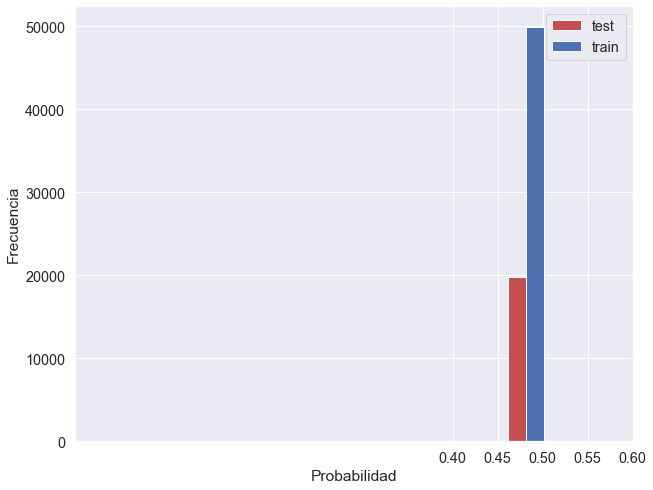

In [177]:
plt.hist([X_test.si,X_train.si], bins=10, label=["test", "train"], color=["r", "b"] )
plt.legend(loc="upper right")
plt.xticks([0.4, 0.45, 0.5, 0.55, 0.6])
plt.ylabel("Frecuencia")
plt.xlabel("Probabilidad")
plt.savefig("histy_psm.jpg", bbox_inches="tight")
plt.show()



In [22]:
len(X_train[X_train.si>=0.5])
#/len(X_train)
len(X_train[X_train.si<0.5])

443795

In [113]:
####Select variables again ####################


In [23]:
X_train=pd.merge(X_train,dfc[["Ingtotugarr", "Pobre", "id"]], left_index=True, right_index=True) 

In [24]:
#Split X train based on psm score
X_ttest=X_train[X_train["si"]>=0.5]
X_train2=X_train[X_train["si"]<0.5]

dependientes=["Ingtotugarr", "Pobre", "Lp", "id", "Li"]
var1=[i for i in X_ttest.columns if i not in dependientes]
var2=[i for i in X_train2.columns if i not in dependientes]

###Create dependent variables
y_ttest=X_ttest[dependientes]
y_train2=X_train2[dependientes]

##Create independent variables
X_ttest=X_ttest[var1]
X_train2=X_train2[var2]



In [25]:
len(y_train2[y_train2.Pobre==1])/len(y_train2.Pobre)

0.21988756069807006

In [26]:
len(y_ttest[y_ttest.Pobre==1])/len(y_ttest.Pobre)

0.39217921045730536

In [27]:
###########Resampling X_train y_train ###################
###Resampling for pobre
sm = SMOTE(random_state=911)
X_train2resp, y_train2resp = sm.fit_resample(X_train2, y_train2[["Pobre"]])


In [28]:
##########################Regresion Models ######################################
###Standardize continue variables and winsorize dependent variable

sc.stats.mstats.winsorize(y_train2["Ingtotugarr"], limits=[0,0.05], inplace=True)

y_ttest["Ingtotugarr"]=(y_ttest["Ingtotugarr"] - y_ttest["Ingtotugarr"].mean()) / y_ttest["Ingtotugarr"].std()
y_train2["Ingtotugarr"]=(y_train2["Ingtotugarr"] - y_train2["Ingtotugarr"].mean()) / y_train2["Ingtotugarr"].std()

for x in X_train2:
    if X_train2[x].nunique()>2:
        X_train2[x]=(X_train2[x] - X_train2[x].mean()) / X_train2[x].std()

for x in X_ttest:
    if X_ttest[x].nunique()>2:
        X_ttest[x]=( X_ttest[x] - X_ttest[x].mean() ) / X_ttest[x].std()

for x in X_test:
    if X_test[x].nunique()>2:
        X_test[x]=( X_test[x] - X_test[x].mean() ) / X_test[x].std()



<ipython-input-28-ca3152b85bb1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[x]=( X_test[x] - X_test[x].mean() ) / X_test[x].std()


In [29]:
# Quantile Regression, Forward Selection
# a=1, b=3, d=1/4

#qr25 = QuantileRegressor(quantile=0.25,alpha=0,solver="highs")
#sfs = SequentialFeatureSelector(qr25,n_features_to_select="auto",direction="forward",cv=10,n_jobs=(-1))
#sfs.fit(X_ttest,y_ttest["Ingtotugarr"])

#m1vars = sfs.get_feature_names_out()
#betah_m1 = sfs.get_params()
#m1vars_2 = sfs.get_support(indices=True)



In [30]:
##Lasso Regresion
lasso = LassoCV(cv=10000, random_state=911, n_jobs=-1, fit_intercept=False)
y_train2["Ingtotugarr"]=y_train2["Ingtotugarr"].astype('int')

resultslasso=lasso.fit(X_train2,y_train2["Ingtotugarr"])


MemoryError: Unable to allocate 1.69 MiB for an array with shape (443750,) and data type int32

In [ ]:

a=np.linspace(0,1,num=100)
ridge = RidgeCV( alphas=a,cv=10000, random_state=911, n_jobs=-1, fit_intercept=False)
resultsridge=ridge.fit(X_train2,y_train2["Ingtotugarr"])